# Graph basics

- What is a graph?
- Applications
- Creation of an undirected graph from a python dictionary.

In [1]:
import os
import sys
# Get the current working directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

from data_loader import LoadNetworkFactory, LoadNetworkX, LoadGraphTool
from data_visual import VisualizeNetworkX, VisualizeGraphTool


(ipykernel_launcher.py:83588): Gtk-WARNING **: 15:14:28.303: Locale not supported by C library.
	Using the fallback 'C' locale.
objc[83588]: Class GNotificationCenterDelegate is implemented in both /Users/brinkley97/opt/anaconda3/envs/graphbreeding_rpy2/lib/libgio-2.0.0.dylib (0x1b6954bc0) and /usr/local/Cellar/glib/2.80.4/lib/libgio-2.0.0.dylib (0x1c49ee6b0). One of the two will be used. Which one is undefined.


## What is a graph?

- Formally, a graph is described as a way of encoding pairwise relationships among a set of objects: it consists of a collection $ V $ of vertices (also called nodes, $ N $) and a collection $ E $ of edges (also called links, $ L $), each of which joins two of the nodes [1]. 

$$

G = (V, E)

$$

- Graphs can be directed or undirected.

In [2]:
# Simple graph using dictionary (also called an adjacency list)
graph1 = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'E'],
    'E': ['B', 'D', 'F'],
    'F': ['C', 'E']
}

graph2 = {
    'A': ['B', 'C'],
    'B': ['C'],
    'C': ['D'],
    'D': ['A']
}

graph3 = {
    1: [2, 3],
    2: [1, 4, 5],
    3: [1, 6],
    4: [2, 5],
    5: [2, 4, 6],
    6: [3, 5]
}

# Print the graph
for node, neighbors in graph1.items():
    print(f"{node} -> {neighbors}")

print()

for node, neighbors in graph2.items():
    print(f"{node} -> {neighbors}")

print()

for node, neighbors in graph3.items():
    print(f"{node} -> {neighbors}")

A -> ['B', 'C']
B -> ['A', 'D', 'E']
C -> ['A', 'F']
D -> ['B', 'E']
E -> ['B', 'D', 'F']
F -> ['C', 'E']

A -> ['B', 'C']
B -> ['C']
C -> ['D']
D -> ['A']

1 -> [2, 3]
2 -> [1, 4, 5]
3 -> [1, 6]
4 -> [2, 5]
5 -> [2, 4, 6]
6 -> [3, 5]


## Create a random graph

In [3]:
N = 6
load_nf = LoadNetworkFactory()
rand_dict_dir = load_nf.generate_rand_dict(N, directed=True)
rand_dict_undir = load_nf.generate_rand_dict(N, directed=False)

In [4]:
rand_dict_dir

{1: [2, 3, 5, 6, 4],
 2: [4, 6],
 3: [4, 5, 6, 2, 1],
 4: [5, 2, 3],
 5: [3, 2, 1, 4, 6],
 6: [4, 1]}

In [5]:
rand_dict_undir

{1: [4, 2],
 2: [4, 6, 5, 3, 1],
 3: [2, 4, 6, 5],
 4: [1, 2, 3, 6, 5],
 5: [2, 3, 4, 6],
 6: [2, 3, 4, 5]}

## Implement with NetworkX

In [6]:
nx_graph_class = LoadNetworkX()
nx_graph_visual = VisualizeNetworkX()

In [7]:
nx_graph1 = nx_graph_class.dict_to_graph(graph1)
nx_graph2 = nx_graph_class.dict_to_graph(graph2)
nx_graph3 = nx_graph_class.dict_to_graph(graph3)
nx_rand_digraph = nx_graph_class.dict_to_graph(rand_dict_dir)
nx_rand_undigraph = nx_graph_class.dict_to_graph(rand_dict_undir)

- [ ] Fix visual representation of directed and undirected.

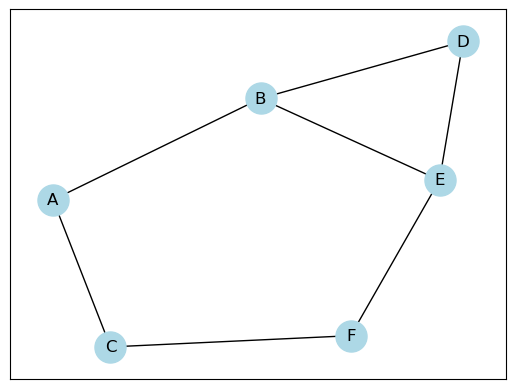

In [8]:
nx_graph_visual.visualize(nx_graph1)

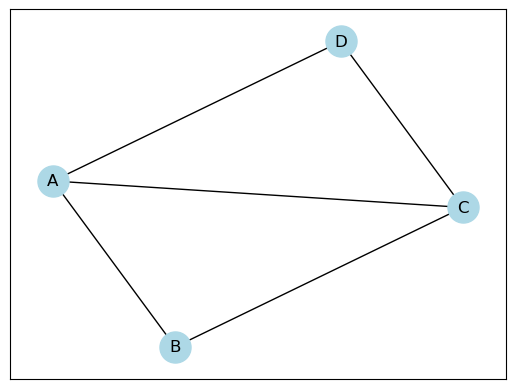

In [9]:
nx_graph_visual.visualize(nx_graph2)

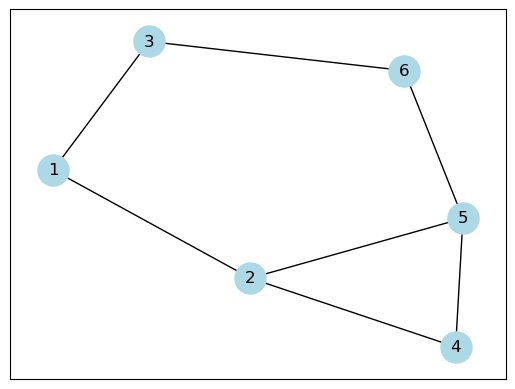

In [10]:
nx_graph_visual.visualize(nx_graph3)

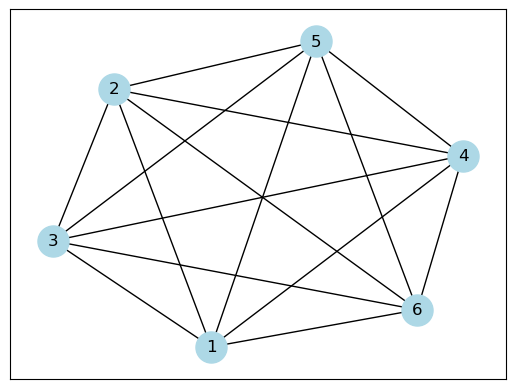

In [11]:
nx_graph_visual.visualize(nx_rand_digraph)

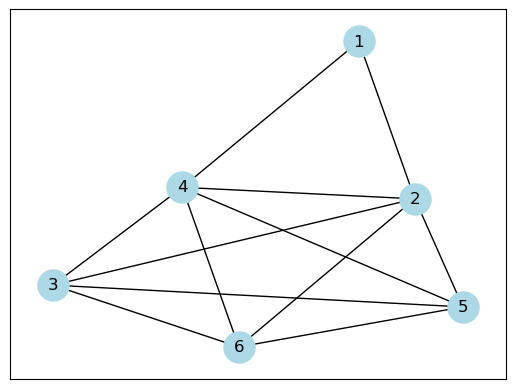

In [12]:
nx_graph_visual.visualize(nx_rand_undigraph)

## Implement with graph-tool

In [13]:
gt_graph_class = LoadGraphTool()
gt_graph_visual = VisualizeGraphTool()

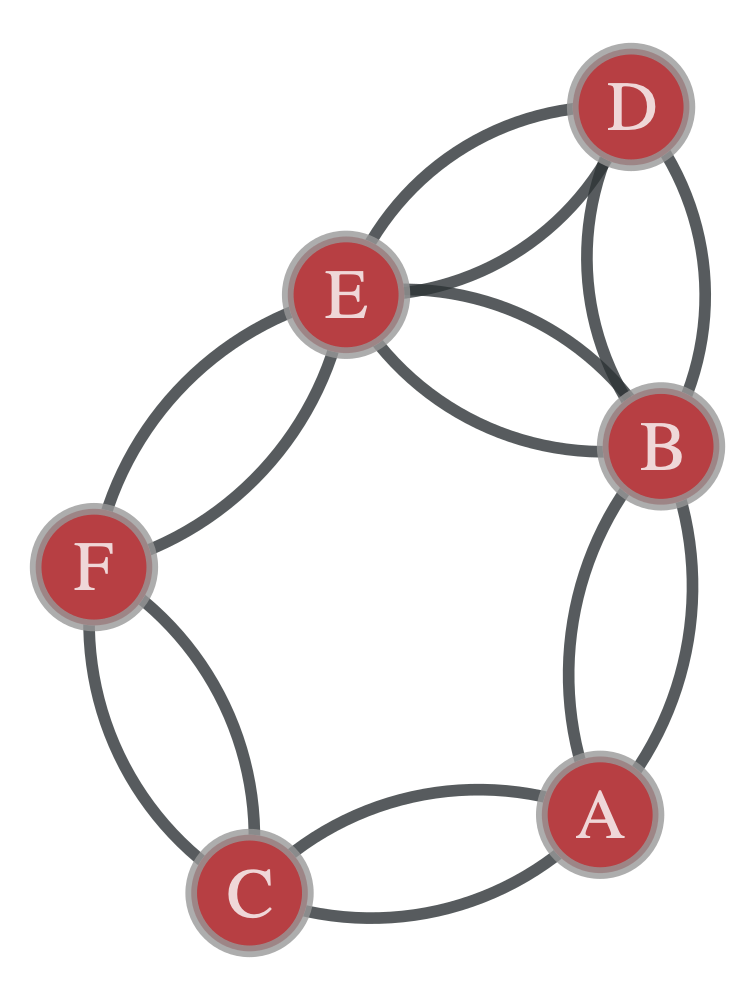

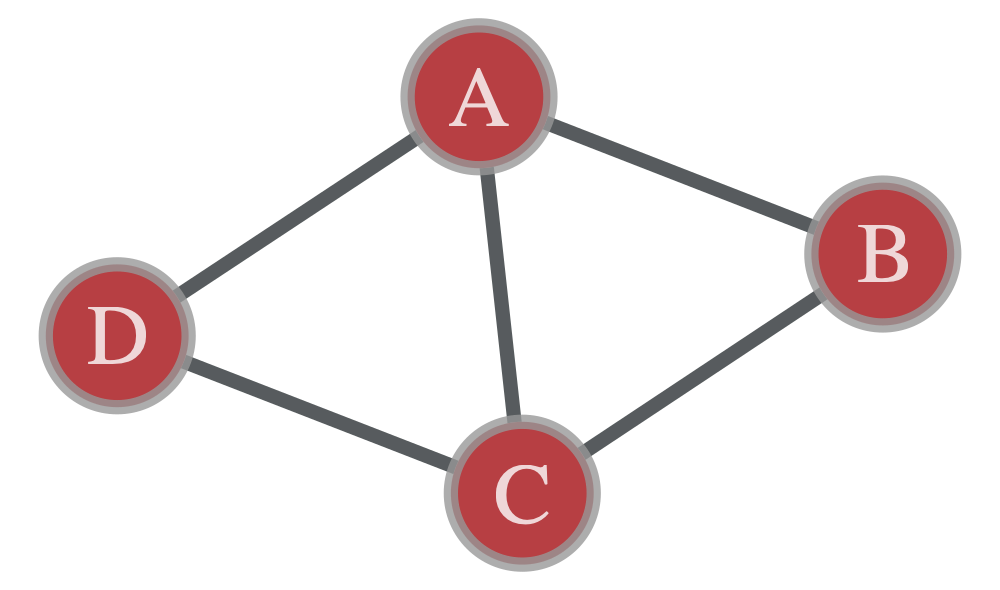

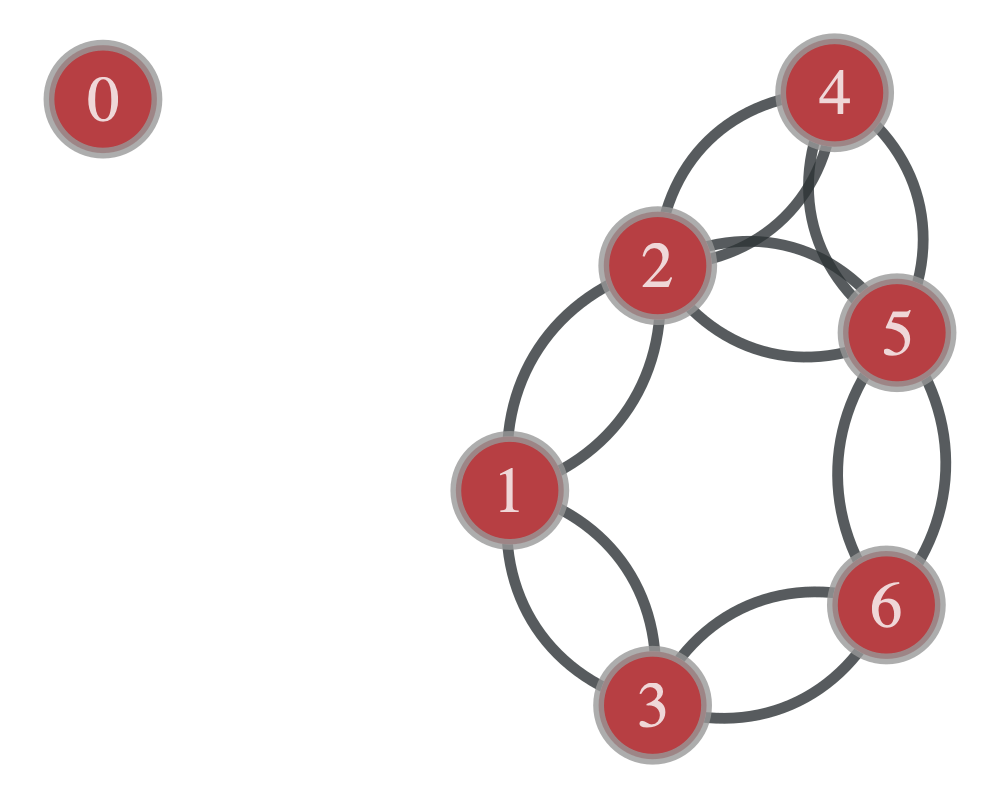

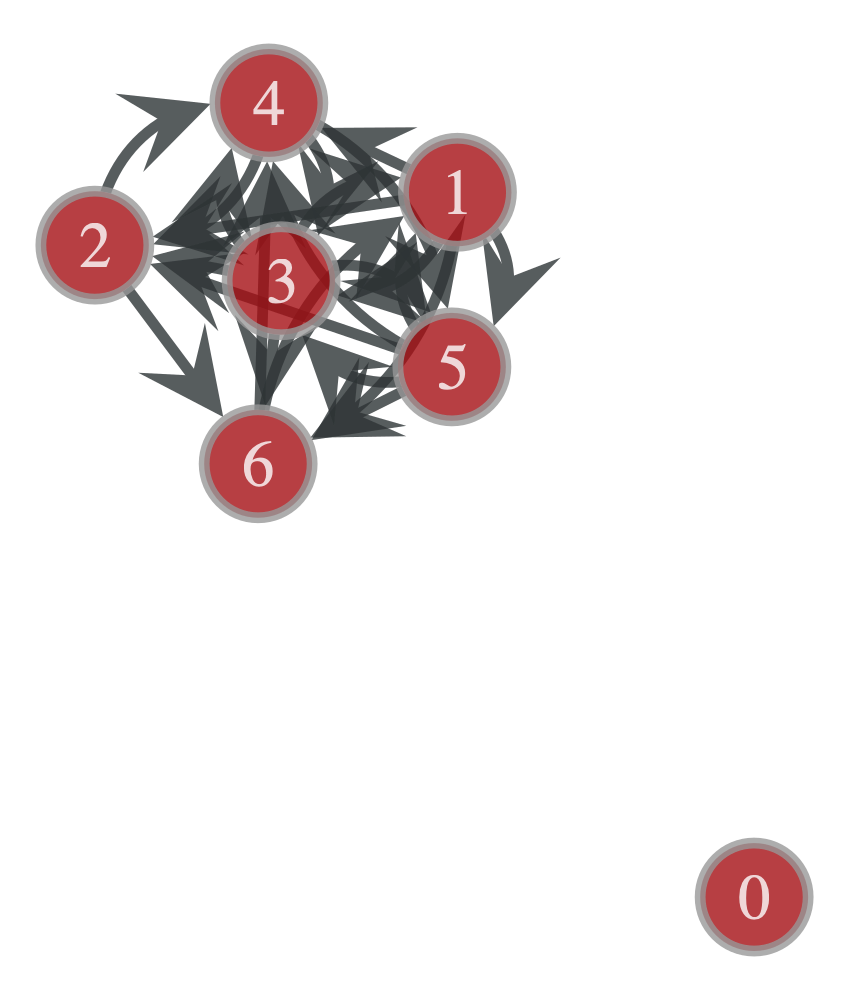

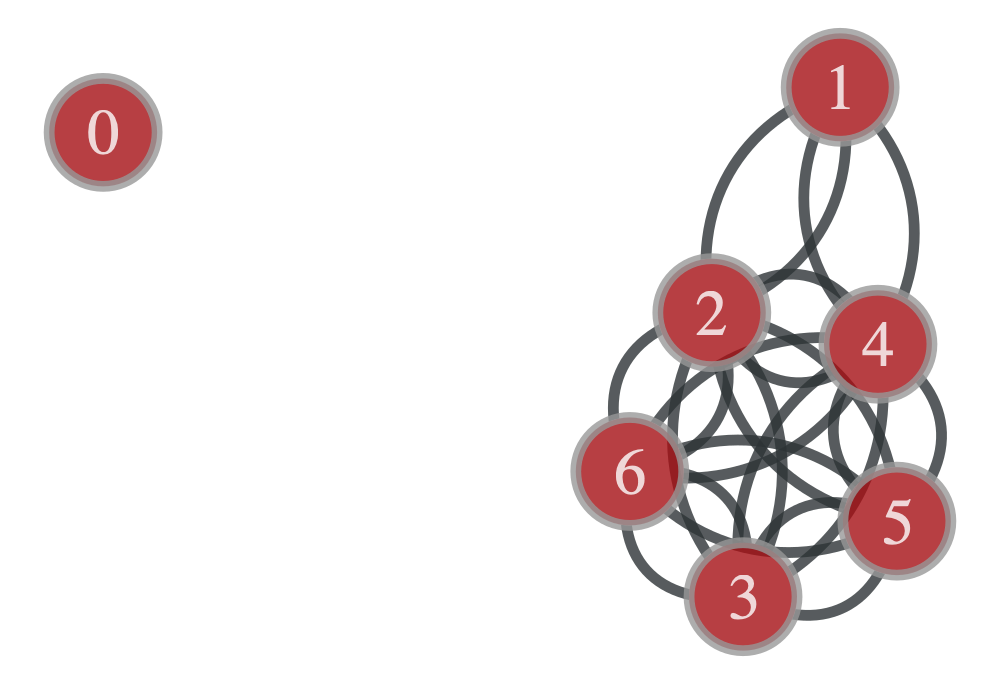

In [14]:
gt_graph1 = gt_graph_class.dict_to_graph(graph1, directed=False)
gt_graph2 = gt_graph_class.dict_to_graph(graph2)
gt_graph3 = gt_graph_class.dict_to_graph(graph3, integer_node_ids=True)
gt_rand_digraph = gt_graph_class.dict_to_graph(rand_dict_dir, directed=True, integer_node_ids=True)
gt_rand_undigraph = gt_graph_class.dict_to_graph(rand_dict_undir, directed=False, integer_node_ids=True)

gt_graph_visual.visualize(gt_graph1)
gt_graph_visual.visualize(gt_graph2)
gt_graph_visual.visualize(gt_graph3)
gt_graph_visual.visualize(gt_rand_digraph)
gt_graph_visual.visualize(gt_rand_undigraph)

# References

1. BOOK: Algorithm Design by Kleinberg, Jon and Tardos